<a href="https://colab.research.google.com/github/kartikeykushwaha14/Dogs-vs-Cats-Classification-with-CNN/blob/main/Dogs_vs_Cats_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# ✅ Step 1: Check GPU Availability
device_name = tf.test.gpu_device_name()
if device_name:
    print(f"✅ GPU is available: {device_name}")
else:
    print("❌ GPU not found. Training will use CPU.")

✅ GPU is available: /device:GPU:0


In [ ]:
# ✅ Step 2: Import Required Libraries
import os
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ✅ Step 3: Download & Extract Dataset (Kaggle is not directly supported in Colab without setup)
# Using a smaller ready-to-use dataset from Microsoft (subset of Cats vs Dogs)
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
with zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r') as zip_ref:
    zip_ref.extractall()

base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

--2025-08-04 17:41:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   174MB/s    in 0.4s    

2025-08-04 17:41:04 (174 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# ✅ Step 4: Prepare Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# ✅ Step 5: Build CNN Model from Scratch
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ✅ Step 6: Compile the Model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# ✅ Step 7: Train the Model (Uses GPU automatically if available)
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5324 - loss: 0.8259 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5245 - loss: 0.6935 - val_accuracy: 0.6070 - val_loss: 0.6674
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.6061 - loss: 0.6599 - val_accuracy: 0.6280 - val_loss: 0.6745
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.6836 - loss: 0.5900 - val_accuracy: 0.6630 - val_loss: 0.6190
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7318 - loss: 0.5308 - val_accuracy: 0.7050 - val_loss: 0.5962
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8085 - loss: 0.4202 - val_accuracy: 0.6880 - val_loss: 0.6585
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8587 - loss: 0.3041 - val_accuracy: 0.6760 - val_loss: 0.7245
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9115 - loss: 0.2090 - val_accuracy: 0.69

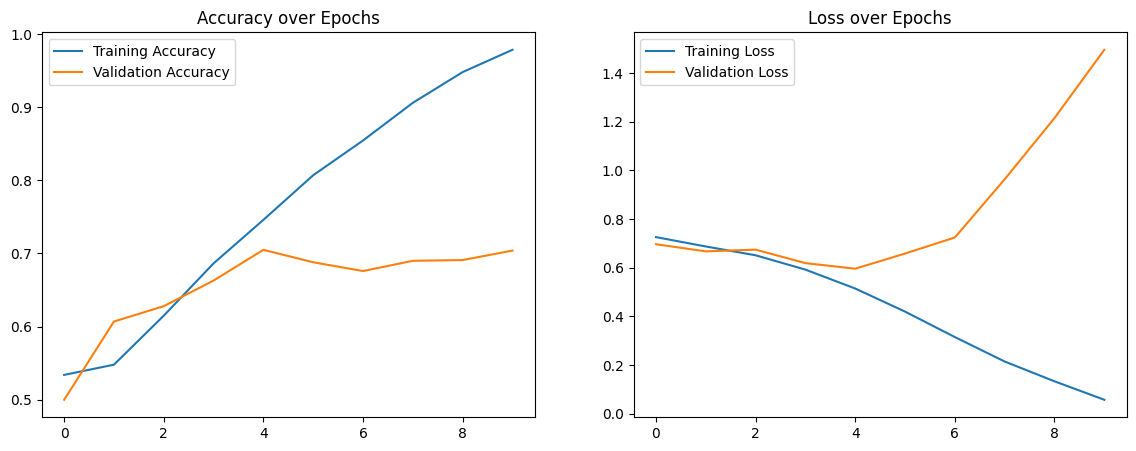

In [ ]:
# ✅ Step 8: Plot Accuracy and Loss Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()

In [ ]:
# ✅ Step 9: Save Model
model.save("cat_dog_cnn_model.h5")
print("✅ Model Saved Successfully")

✅ Model Saved Successfully


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_multiple_images(image_paths):
    plt.figure(figsize=(15, 5))

    for i, img_path in enumerate(image_paths):
        # Load and preprocess
        img = image.load_img(img_path, target_size=(150, 150))
        img_tensor = image.img_to_array(img) / 255.0
        img_tensor = np.expand_dims(img_tensor, axis=0)

        # Predict
        prediction = model.predict(img_tensor)[0][0]
        label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"

        # Show image with label
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(label)

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/tmp/ipython-input-2200833237.py:24: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


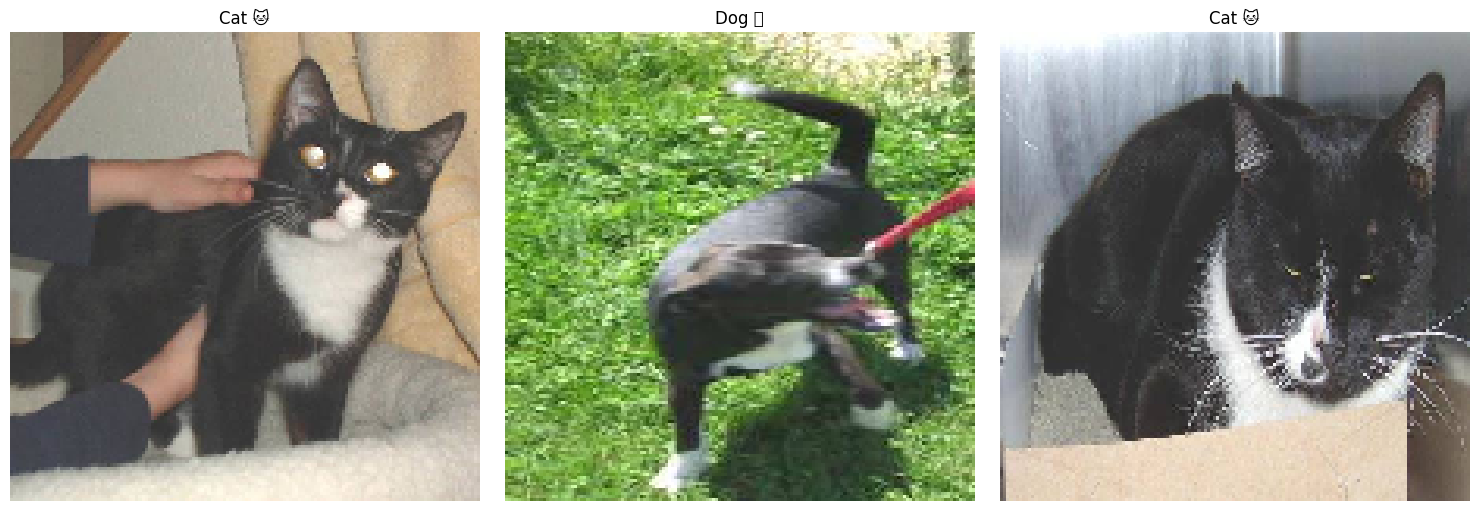

In [ ]:
image_list = [
    "cats_and_dogs_filtered/validation/cats/cat.2000.jpg",
    "cats_and_dogs_filtered/validation/dogs/dog.2000.jpg",
    "cats_and_dogs_filtered/validation/cats/cat.2001.jpg"
]

predict_multiple_images(image_list)
